### **Handling missing values**

---


#### **1. Complete Case Analysis (CCA)**


Applicable only if the data is-

* Missing Completely at Random (MCAR)
* Dropping the data does not change the distribution of the data


In [5]:
import os
import pandas as pd


path = os.path.join("..", "data", "data_science_job.csv")
df = pd.read_csv(path)
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
11132,14005,city_152,0.698,NaN,No relevent experience,no_enrollment,High School,NaN,5.0,NaN,NaN,26.0,0.0
12497,1697,city_160,0.920,Male,Has relevent experience,Full time course,High School,NaN,8.0,100-500,Pvt Ltd,13.0,0.0
13244,14833,city_114,0.926,Male,No relevent experience,Full time course,Graduate,No Major,5.0,NaN,NaN,28.0,0.0
12757,14546,city_71,0.884,Male,Has relevent experience,Part time course,Masters,STEM,6.0,<10,Funded Startup,70.0,0.0
5268,23048,city_70,0.698,NaN,No relevent experience,Full time course,Graduate,STEM,2.0,NaN,Pvt Ltd,22.0,1.0


In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
new_df = df.dropna(subset=["city_development_index", "experience"])

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='experience', ylabel='Density'>

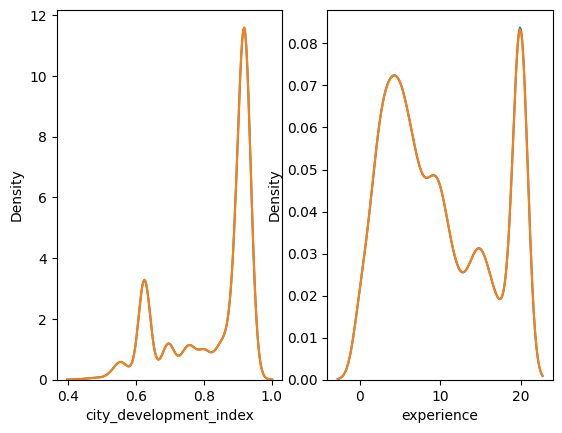

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, (first, second) = plt.subplots(ncols=2)

sns.kdeplot(df, x="city_development_index", ax=first)
sns.kdeplot(new_df, x="city_development_index", ax=first)
sns.kdeplot(df, x="experience", ax=second)
sns.kdeplot(new_df, x="experience", ax=second)

---


#### **2. Imputation**


##### **1. Univariate**


**i. Numerical Data**


* **Mean-Median Imputation**

Use mean imputation if the data is normally distributed, 
use median imputation if the data is skewed.

Disadvantages-

* changes the distribution
* creates outliers
* changes the correlation and covariance of the data


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"]
)

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        ("mean", SimpleImputer(strategy="mean"), ["city_development_index"]),
        ("median", SimpleImputer(strategy="median"), ["experience"]),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean', SimpleImputer(),
                                 ['city_development_index']),
                                ('median', SimpleImputer(strategy='median'),
                                 ['experience'])])

In [13]:
new_df = ct.fit_transform(df)
new_df.sample(5)

,mean__city_development_index,median__experience,remainder__enrollee_id,remainder__city,remainder__gender,remainder__relevent_experience,remainder__enrolled_university,remainder__education_level,remainder__major_discipline,remainder__company_size,remainder__company_type,remainder__training_hours,remainder__target
17067,0.624,6.0,18499,city_21,NaN,No relevent experience,Full time course,High School,NaN,NaN,NaN,188.0,1.0
18389,0.910,7.0,26352,city_16,Male,Has relevent experience,no_enrollment,Primary School,NaN,500-999,Pvt Ltd,12.0,0.0
14982,0.843,17.0,8056,city_159,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,90.0,0.0
7755,0.926,15.0,1470,city_114,Male,No relevent experience,no_enrollment,Masters,STEM,NaN,Pvt Ltd,NaN,1.0
10553,0.550,4.0,13242,city_11,Male,Has relevent experience,Full time course,Masters,Humanities,NaN,NaN,56.0,1.0


---


* **Arbitrary Value Imputation**

Replace missing values with some arbitrary value not present within the dataset.
Done to distinguish missing values in the dataset.


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "random_value",
            SimpleImputer(strategy="constant", fill_value=100),
            ["city_development_index", "experience"],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('random_value',
                                 SimpleImputer(fill_value=100,
                                               strategy='constant'),
                                 ['city_development_index', 'experience'])])

In [19]:
new_df = ct.fit_transform(df)
new_df.sample(5)

,random_value__city_development_index,random_value__experience,remainder__enrollee_id,remainder__city,remainder__gender,remainder__relevent_experience,remainder__enrolled_university,remainder__education_level,remainder__major_discipline,remainder__company_size,remainder__company_type,remainder__training_hours,remainder__target
3936,0.689,0.0,22361,city_149,NaN,No relevent experience,Full time course,NaN,NaN,1000-4999,Public Sector,86.0,1.0
10101,0.579,1.0,4671,city_74,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,NaN,16.0,1.0
7584,0.897,13.0,23357,city_136,Male,Has relevent experience,NaN,NaN,NaN,NaN,NaN,57.0,0.0
14030,0.920,20.0,22201,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,Pvt Ltd,160.0,0.0
4475,0.910,2.0,32763,city_16,Female,No relevent experience,Full time course,High School,NaN,50-99,NaN,32.0,0.0


---


* **End of distribution Imputation**


Same as random value imputation, just the random value is replaced with the end values of their distribution.

For normally distributed data, 
* value = mean + (3 * standard_deviation), or
* value = mean - (3 * standard_deviation)

For skewed data, 
* value = Q1 - (1.5 * IQR), or
* value = Q3 + (1.5 * IQR)

where IQR = Q3 - Q1


---


**ii. Categorical Data**


* **Most frequent value Imputation (Mode)**


This is same as mean and median for numerical data, with the same assumptions and drawbacks.


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("mode", SimpleImputer(strategy="most_frequent"), [])])
ct.set_output(transform="pandas")

ColumnTransformer(transformers=[('mode',
                                 SimpleImputer(strategy='most_frequent'), [])])

---


* **Missing category Imputation**


Same as arbitrary value imputation, the missing values are replaced with the keyword **"Missing"** or something along those lines to distinguish missing data points.


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "missing_category",
            SimpleImputer(strategy="constant", fill_value="Missing"),
            [],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('missing_category',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 [])])

---


##### **2. Multivariate**


**i. KNN Imputer**


**ii. Iterative Imputer**


---
